### Importing and Downloading Packages for Text Analysis

We set up the environment for text analysis by importing required Python packages and downloading essential resources for natural language processing (NLP).

#### Packages Imported:
- `requests`: Used for sending HTTP requests to fetch web content.
- `BeautifulSoup`: Utilized for parsing HTML content retrieved from web pages.
- `nltk`: The Natural Language Toolkit, a comprehensive library for NLP tasks.
- `Counter` from `collections`: Utilized to count the frequency of words or elements.

#### NLTK Resources Downloaded:
- `punkt`: NLTK's punkt tokenizer, necessary for tokenizing text into words.

In [1]:
# Import and download packages
import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Retrieving and Extracting Text

In [3]:
# URL of Gulliver's Travels by Jonathan Swift for parsing
url = "https://www.gutenberg.org/cache/epub/65473/pg65473-images.html"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find and extract the text content
text = soup.get_text()

In [4]:
# Tokenize the text into words
words = nltk.word_tokenize(text)

# Remove punctuation and convert to lowercase
words = [word.lower() for word in words if word.isalpha()]

# Filter out stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
print("List of stopwords: ", stop_words)
filtered_words = [word for word in words if word not in stop_words]


List of stopwords:  {'below', 'there', 'to', 'during', 'both', 're', 'mightn', 'an', "needn't", 'been', 'shouldn', 'hasn', 'wouldn', "you've", "weren't", 'our', 'these', 'he', "isn't", 'while', "should've", 'then', 'about', 'this', 'won', 'or', 'hers', 'very', 'couldn', 'through', 'under', 'herself', 'most', 'm', 't', 'yourselves', 'out', 'i', 'whom', 'a', 'theirs', 'where', 'his', 'him', 'than', 'shan', 'is', 'did', 'doesn', 'yourself', 'ma', 'after', 'into', 'further', 'should', 'you', 'in', 'are', "haven't", 'weren', 'up', 'hadn', 'off', 'do', 'why', 'doing', 'no', 'll', 'such', 'those', 'does', 'down', "mustn't", 'with', 'on', 've', 'd', 'at', 'have', 'same', 'some', 'each', 'we', 'more', "don't", 'am', 'having', 'between', 'who', 'had', "she's", 'by', "didn't", 'what', 'so', 'how', 'nor', "hadn't", "you're", 'own', 'all', 'the', 'can', 'any', 'myself', 'isn', 'that', 'from', 'if', 'against', 'here', 'itself', 'because', 'ours', "it's", 'aren', 'yours', "wasn't", "wouldn't", 'their

In [5]:
# Count word frequencies
word_freq = Counter(filtered_words)

# Print the 10 most common words
print("The Top 10 common words used in Gulliver's Travels book are:\n", word_freq.most_common(10))

The Top 10 common words used in Gulliver's Travels book are:
 [('upon', 383), ('could', 372), ('would', 344), ('great', 295), ('one', 270), ('two', 242), ('made', 221), ('country', 206), ('much', 201), ('several', 178)]


## Top 10 Most Common Words
Plotly is used to create an interactive bar chart visualizing the frequency distribution of the top 10 most common words in the novel "Gulliver's Travels".

In [6]:
import plotly.graph_objects as go
# Calculate the top 10 most common words
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

# Create a bar chart using Plotly
fig = go.Figure(data=[go.Bar(x=top_words, y=word_counts, marker_color='mediumaquamarine')])
fig.update_layout(title='Top 10 Most Common Words in Gulliver\'s Travels',
                  xaxis_title='Words',
                  yaxis_title='Frequency',
                  xaxis=dict(tickangle=45),
                  plot_bgcolor='rgba(0,0,0,0)')
fig.show()


## Word Cloud
The visualization created here is a word cloud, which visually represents the frequency distribution of words in the text. In the word cloud, the size of each word corresponds to its frequency in the text. Word cloud provides a visual summary of the most prominent words in the text, allowing viewers to quickly identify key themes or topics.

In the generated word cloud, certain words such as "upon", "could", "should", and "great" appear larger in size compared to others. This larger size indicates that these words are more frequent in the novel, "Gulliver's Travels".

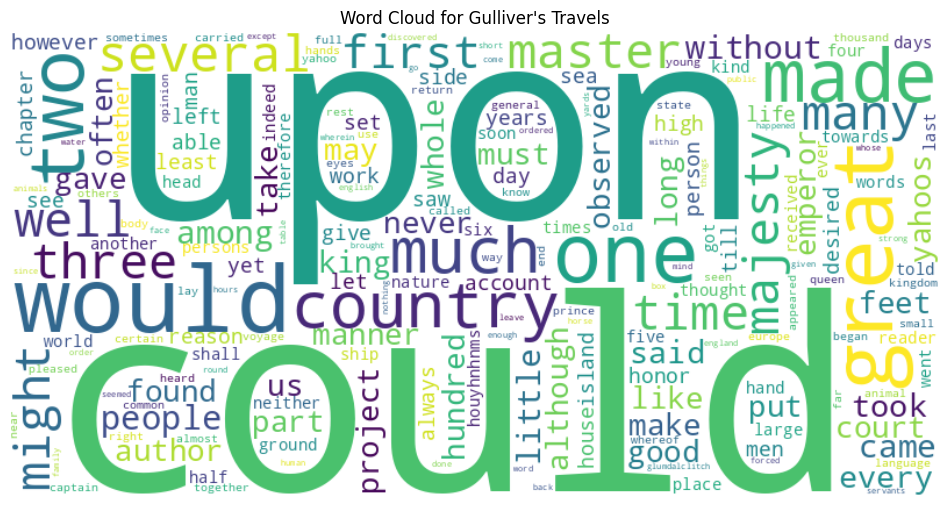

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Gulliver\'s Travels')
plt.show()

## Parts of Speech Distribution
This segment performs part-of-speech (POS) tagging on the filtered words from the text and then visualizes the distribution of different parts of speech using a bar chart.

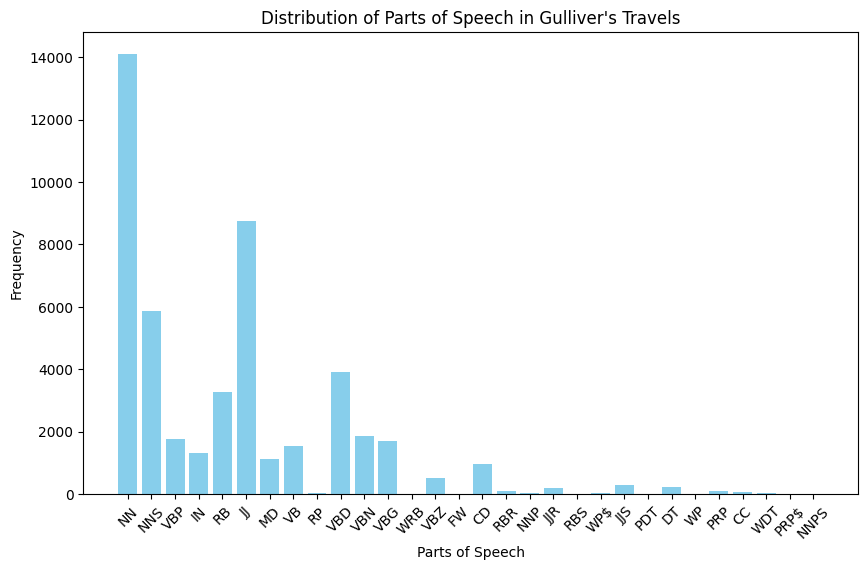

In [8]:
import matplotlib.pyplot as plt

# Perform part-of-speech tagging
pos_tags = nltk.pos_tag(filtered_words)

# Count the frequency of each POS tag
pos_counts = Counter(tag for word, tag in pos_tags)

# Plotting the POS tag distribution
plt.figure(figsize=(10, 6))
pos_labels, pos_values = zip(*pos_counts.items())
plt.bar(pos_labels, pos_values, color='skyblue')
plt.title('Distribution of Parts of Speech in Gulliver\'s Travels')
plt.xlabel('Parts of Speech')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
